In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np

# 1. Experimentelle Daten

## (a) 
Führen Sie das Phyhox-Fahrstuhl Experiment durch und stellen sie die Daten für Ort, Geschwindigkeit und Beschleunigung als Funktion der Zeit mit matplotlib graphisch dar.
Mit welchen Funktionen können die Daten beschrieben werden?
Simulieren sie die Bewegung mit vpython oder pyplay

In [21]:
#pd.read_excel("\D:\Dokumente\Uni\6.Semester\Modellbildung und Simulation\Aufgabe 1\phyphoxTestdatenFahrstuhl.xls")
experiment = pd.read_csv("Pressure and velocity.csv", ",")
experiment_beschleunigung = pd.read_csv("Acceleration.csv", ",")

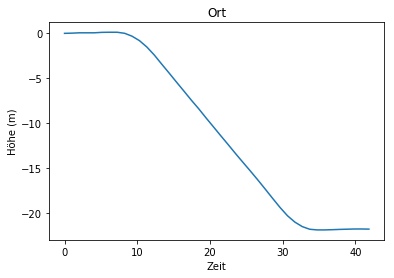

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Ort')
ax1.set_xlabel('Zeit')
ax1.set_ylabel('Höhe (m)')
ax1.plot(experiment.values[:,0], experiment.values[:,2])

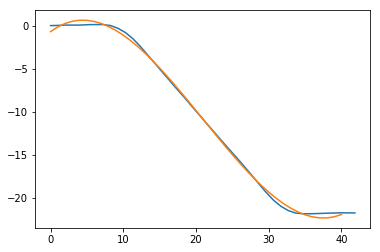

In [23]:
ort = np.polyfit(experiment.values[:,0], experiment.values[:,2], deg=3)
x = range(0, 41)
y = [ort[0]*xs**3 + ort[1]*xs**2 + ort[2]*xs + ort[3] for xs in x]
plt.plot(experiment.values[:,0], experiment.values[:,2])
plt.plot(x,y)

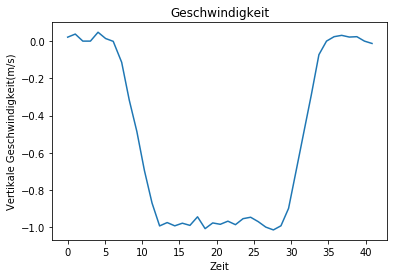

In [24]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.set_title('Geschwindigkeit')
ax2.set_xlabel('Zeit')
ax2.set_ylabel('Vertikale Geschwindigkeit(m/s)')
ax2.plot(experiment.values[:,0], experiment.values[:,4])

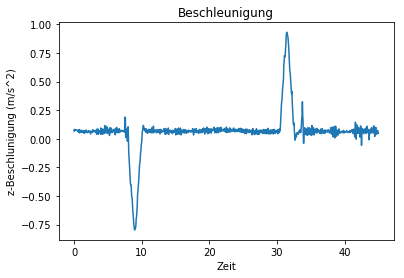

In [25]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.set_title('Beschleunigung')
ax3.set_xlabel('Zeit')
ax3.set_ylabel('z-Beschlunigung (m/s^2)')
ax3.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.show()

In [26]:
def beschl(x):
    if x < 7.5:
        return 0.07
    elif x < 8.8:
        return -0.669*x+5.089
    elif x < 10.4:
        return 0.512*x-5.373
    elif x < 30:
        return 0.07

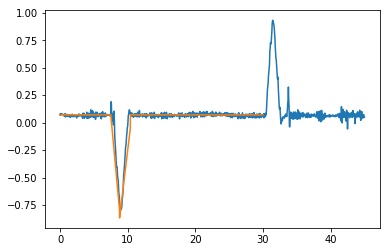

In [27]:
x = np.arange(0,45, 0.01)
y = [beschl(xs) for xs in x]
plt.plot(experiment_beschleunigung.values[:,0], experiment_beschleunigung.values[:,1])
plt.plot(x,y)

In [28]:
experiment.values[1,0], experiment.values[1,2]
experiment.values[2,0], experiment.values[2,2]
experiment.values[3,0], experiment.values[3,2]

(3.053313, 0.060081318700000004)

In [29]:
a = sy.Symbol("a")
b = sy.Symbol("b")
c = sy.Symbol("c")


## (b) 
Welches Polynom beschreibt am bested die Daten Unbekannt.txt. Verwenden Sie pylab.polyfit

In [30]:
poly = np.loadtxt("UnbekannteDaten.txt", skiprows=1)

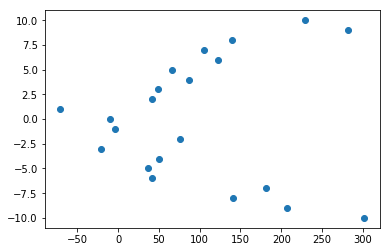

In [31]:
plt.plot(poly[:,0], poly[:,1], 'o')

In [32]:
p = np.polyfit(poly[:,0], poly[:,1], deg=4)

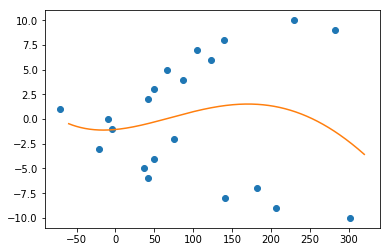

In [33]:
x = range(-60,321)
y = [p[0]*xs**4 + p[1]*xs**3 + p[2]*xs**2 + p[3]*xs + p[4] for xs in x]
plt.plot(poly[:,0], poly[:,1], 'o')
plt.plot(x,y)
plt.show()

## (c) 
Es werden verschiedene Massen an eine vertikale Feder gehängt und die Federlängen bestimmt die Daten befinden sich im File DatenFeder.txt. Führen Sie eine lineare Regession mit pylab.polyfit durch und bestimmen Sie die Federkonstanten für eine lineare ($F = Dx$) und eine kubische Funktion ($F = D_1x + D_2x^2 + D_3x^3$)

In [34]:
feder = np.loadtxt("DatenFeder.txt", skiprows=1)

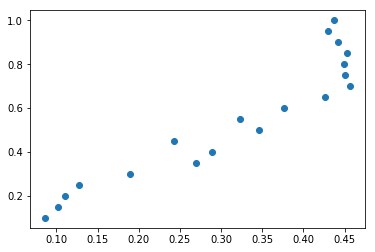

In [35]:
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [36]:
linear = np.polyfit(feder[:,0], feder[:,1], deg=1)

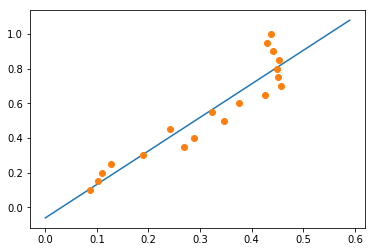

In [37]:
x = np.arange(0, 0.6, 0.01)
y = [linear[0]*xs + linear[1] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

In [38]:
kubic = np.polyfit(feder[:,0], feder[:,1], deg=4)

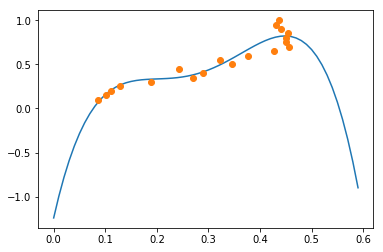

In [39]:
x = np.arange(0, 0.6, 0.01)
y = [kubic[0]*xs**4 + kubic[1]*xs**3 + kubic[2]*xs**2 + kubic[3]*xs + kubic[4] for xs in x]
plt.plot(x,y)
plt.plot(feder[:,0], feder[:,1], 'o')
plt.show()

## (d)
Ein kleiner Ball wird mit einer bestimmten Anfangsgeschwindigkeit unter einem bestimmten Abwurfwinkel geworfen und die $x$- und $y$-Position zu verschiedenen Zeitpunkten mit einer Videoanalyse gemessen (DatenSchWurf.txt). Führen Sie eine lineare Regression mit pylab polyfit durch. Schätzen sie die Flugzeit und Geschwindigkeit des Balles ab.

In [40]:
wurf = np.loadtxt("DatenSchWurf.txt", skiprows=1)

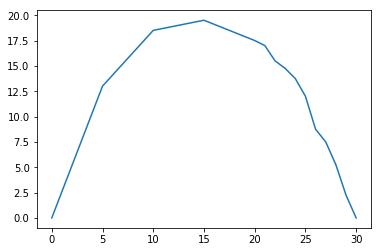

In [42]:
distance = wurf[:,0]
height = wurf [:,1]
plt.plot(distance, height)

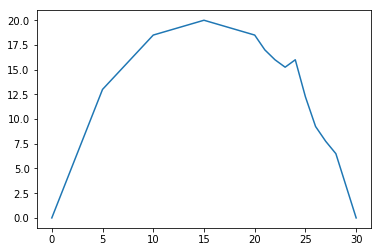

In [43]:
height2 = wurf[:,2]
plt.plot(distance, height2)

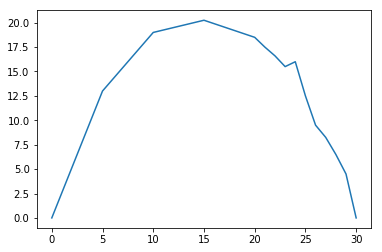

In [44]:
height3 = wurf[:,3]
plt.plot(distance, height3)

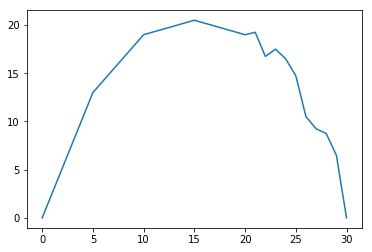

In [45]:
height4 = wurf[:,4]
plt.plot(distance, height4)

In [48]:
distance = wurf[:,0]
height = wurf[:,1:4]
c = np.polyfit(distance, height, deg=2)
c

array([[-0.08906891, -0.09014064, -0.09041047],
       [ 2.64889548,  2.71009403,  2.72935024],
       [ 0.71048819,  0.52352761,  0.55393343]])

-0.09041047350266546 2.7293502351834444 0.5539334274066994


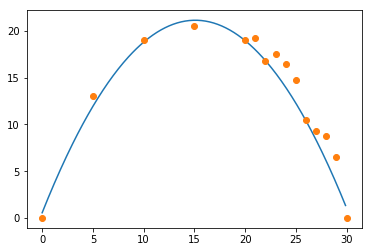

In [58]:
x = np.arange(0, 30, 0.1)
print(c[0,2],c[1,2],c[2,2])
y = [c[0,2]*xs**2 + c[1,2]*xs + c[2,2] for xs in x]
plt.plot(x,y)
plt.plot(wurf[:,0], wurf[:,4], 'o')
plt.show()

# 2. Wurfbewegung

## (a)
Ein Objekt wird von $x = x_0$ mit einer Anfangsgeschwindigkeit $v_0$ und einem Anfangswinkel $\theta_0$ abgeworfen. Die Reibung kann vernachlässtigt werden. Die einzige Kraft ist die Gravitationskraft in $y$-Richtung.

### i.
Lösen Sie die Differentialgleichungen: $\ddot{x} = 0, \ddot{y} = -g$ numerisch und vergleichen Sie das Ergebnis mit der analytischen Lösungen. Berechnen Sie die Wurfweite als Funktion des Abwurfwinkels.

### ii.
Formulieren Sie die Aufgabe als Randwertproblem für einen senkrechten Wurf ($\theta_0 = \pi$). Bestimmen Sie die Anfangsgeschwindigkeit bei vorgegebener Wurfhöhe mit Hilfe einer binären Suche.

## (b)
Ein kugelförmiges Objekt wird von einem Punkt $x_0$ unter einem Winkel $\theta_0$ abgeworfen. Es wirkt eine Reibungskraft entgegen der Bewegungsrichtung mit dem Bertag: $$F = 0.5\pi R^2pCv^2$$ ($R$: Radius der Kugel, $p$:Dichte der Luft, $v$: Geschwindigkeit der Kugel, $C = 0.5$)

### i.
Zeigen Sie, dass das Problem mit den folgenden Bewegungsgleichungen beschrieben werden kann. 
$$\ddot{x} = - \frac{0.5\pi R^2Cp}{m}\dot{x}\sqrt{\dot{x}^2 + \dot{y}^2}$$
$$\ddot{y} = -g- \frac{0.5\pi R^2Cp}{m}\dot{y}\sqrt{\dot{x}^2 + \dot{y}^2}$$

### ii.
Führen Sie die beiden Differentialgleichungen 2. Ordnung in ein System von 4 Differentialgleichungen 1. Ordnung über und visualisieren Sie die Wurftrajektorie.

### iii.
Untersuchen Sie die Wurfweite als Funktion der Masse und des Abwurfwinkels